In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
# Load the dataset
file_path = "/content/housing_price_dataset.csv"  # Update path if needed
df = pd.read_csv(file_path)

In [ ]:

# Display basic info
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB
None
         SquareFeet      Bedrooms     Bathrooms     YearBuilt          Price
count  50000.000000  50000.000000  50000.000000  50000.000000   50000.000000
mean    2006.374680      3.498700      1.995420   1985.404420  224827.325151
std      575.513241      1.116326      0.815851     20.719377   76141.842966
min     1000.000000      2.000000      1.000000   1950.000000  -36588.165397
25%     1513.000000      3.000000      1.000000   1967.000000  169955.860225
50%     2007.000000

In [5]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64


In [6]:
# Drop rows or columns with missing values (if necessary)
df.dropna(inplace=True)

In [7]:
print(df.columns)


Index(['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt',
       'Price'],
      dtype='object')


In [8]:
target_column = 'Price'  # Use the correct case


In [9]:
features = [col for col in df.columns if col != target_column]
X = df[features]
y = df[target_column]


In [10]:
X = pd.get_dummies(X, columns=['Neighborhood'], drop_first=True)  # One-hot encoding


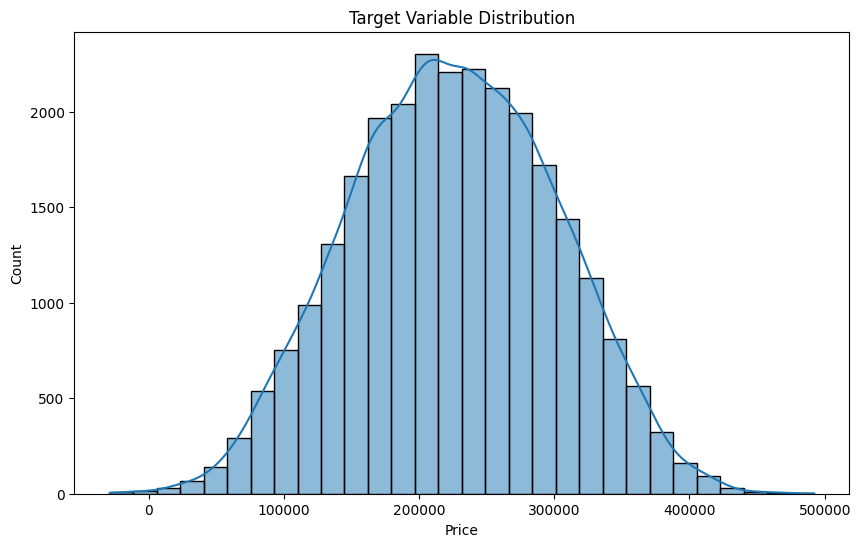

In [11]:
# Perform EDA
plt.figure(figsize=(10, 6))
sns.histplot(y, bins=30, kde=True)
plt.title("Target Variable Distribution")
plt.show()

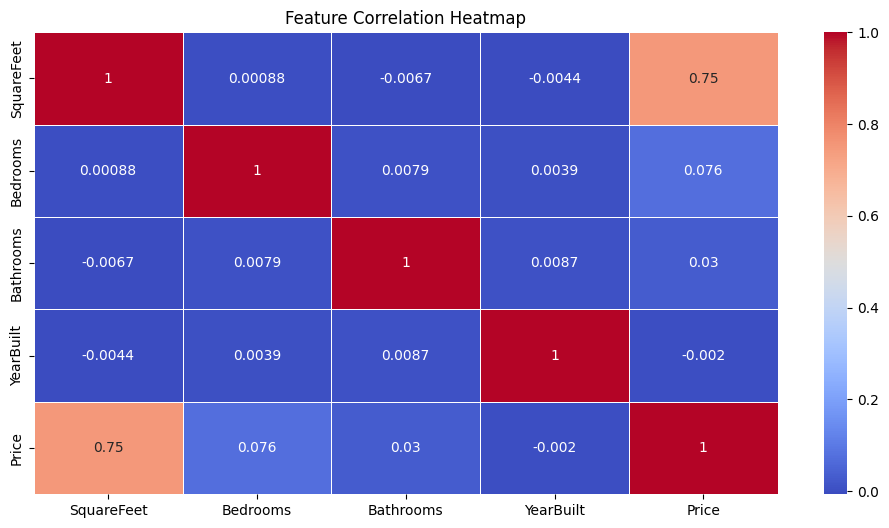

In [13]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [14]:
# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Standardize features if necessary
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
# Predict on test data
y_pred = model.predict(X_test)

In [19]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Model Evaluation:\nMAE: {mae:.2f}\nMSE: {mse:.2f}\nRMSE: {rmse:.2f}\nR² Score: {r2:.2f}")

Model Evaluation:
MAE: 40133.87
MSE: 2498545463.60
RMSE: 49985.45
R² Score: 0.57


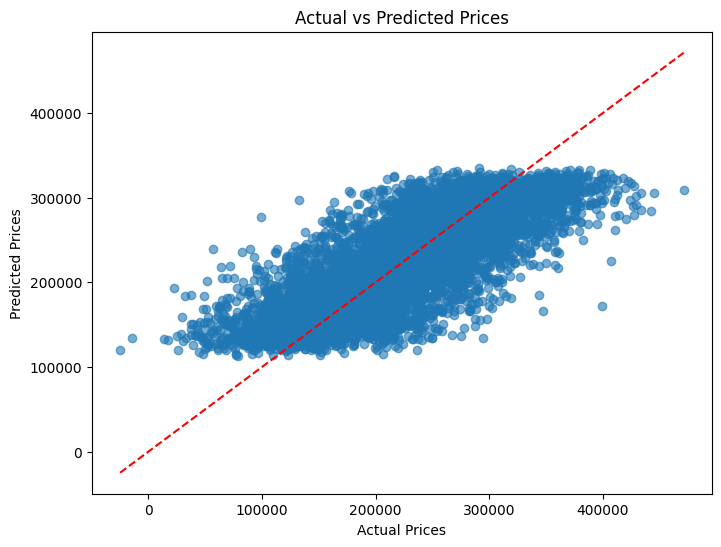

In [20]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="dashed")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()